### Задание 1

In [70]:
#Импортируем библиотеки и датасет
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [76]:
#Делим данные на датафреймы и разбиваем на train/test
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\maxyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [75]:
#Производим стандартизацию данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [26]:
#Строим модель TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\Users\maxyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


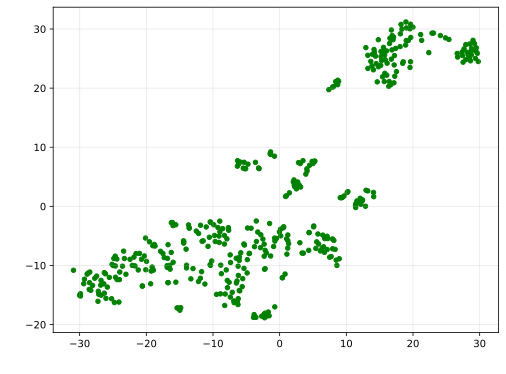

In [77]:
#Строим диаграмму рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(x=X_train_tsne[:,0], y=X_train_tsne[:,1], color="green", s=20)

plt.xlabel('Component_1', fontsize='14', color='white')
plt.ylabel('Component_2', fontsize='14', color='white')

plt.grid(alpha = 0.3)
plt.show()

### Задание 2

In [61]:
#Разбиваем данные на 3 кластера
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

train_labels = kmeans.fit_predict(X_train_scaled)

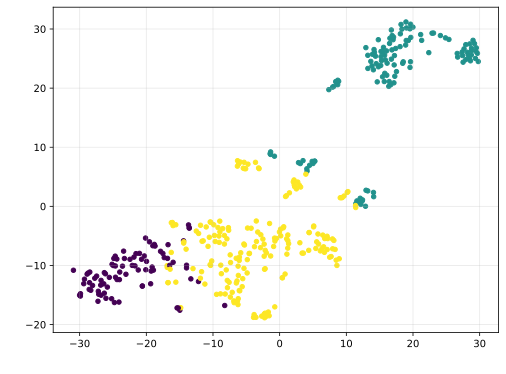

In [80]:
#Строим диграмму рассеяния с разделением на кластеры
plt.figure(figsize=(8, 6))
plt.scatter(x=X_train_tsne[:,0], y=X_train_tsne[:,1], c=train_labels, s=20)

plt.xlabel('Component_1', fontsize='14', color='white')
plt.ylabel('Component_2', fontsize='14', color='white')

plt.grid(alpha = 0.3)
plt.show()

In [106]:
print ('TRAIN DF\nCRIME and PRICE means sorted by clusters')
print(f"\nCRIM1: {X_train.loc[train_labels == 0, 'CRIM'].mean()}\nCRIM2: {X_train.loc[train_labels == 1, 'CRIM'].mean()}\nCRIM3: {X_train.loc[train_labels == 2, 'CRIM'].mean()}")
print(f"\nPRICE1: {y_train[train_labels == 0].mean()}\nPRICE2: {y_train[train_labels == 1].mean()}\nPRICE3: {y_train[train_labels == 2].mean()}")

TRAIN DF
CRIME and PRICE means sorted by clusters

CRIM1: 0.07356558139534884
CRIM2: 10.797028425196851
CRIM3: 0.4216602094240837

PRICE1: 27.78837209302326
PRICE2: 16.165354330708663
PRICE3: 24.958115183246072


### Задание 3

In [110]:
test_labels = kmeans.predict(X_test_scaled)

print ('TEST DF\nCRIME and PRICE means sorted by clusters')
print(f"\nCRIM1: {X_test.loc[test_labels == 0, 'CRIM'].mean()}\nCRIM2: {X_test.loc[test_labels == 1, 'CRIM'].mean()}\nCRIM3: {X_test.loc[test_labels == 2, 'CRIM'].mean()}")
print(f"\nPRICE1: {y_test[test_labels == 0].mean()}\nPRICE2: {y_test[test_labels == 1].mean()}\nPRICE3: {y_test[test_labels == 2].mean()}")

TEST DF
CRIME and PRICE means sorted by clusters

CRIM1: 0.06206
CRIM2: 10.165531142857143
CRIM3: 0.2660788235294118

PRICE1: 31.35
PRICE2: 16.43714285714286
PRICE3: 21.860784313725492


C:\Users\maxyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


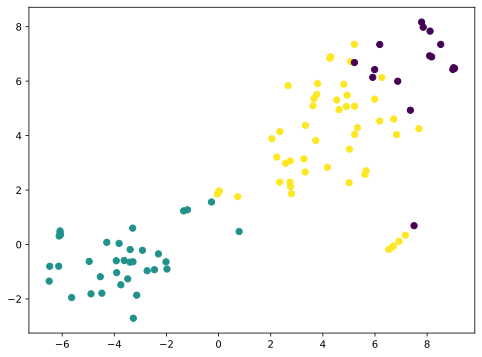

In [121]:
#TSNE тестовой выборки + визуализация кластеров
X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.figure(figsize=[8, 6])
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels, s=40)

plt.show()